## TOPIC: STUDENT DEPRESSION 
AIM: Predicting student depression  
ANALYSIS TYPE: Classification task

In [49]:
# Load the needed lybraries

import pandas as pd

# upload the DataFrame
df = pd.read_csv("dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [50]:
num_rows, num_columns = df.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 27901 rows and 18 columns.


In [51]:
columns_names = df.columns
print(f"The feature are {columns_names}.")

The feature are Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object').


## DATA CLEANING

In [52]:
# NA detection 
na_per_colonna = df.isna().sum()

print("NA per colonna:")
print(na_per_colonna)

totale_na = df.isna().sum().sum()
print("Totale NA:", totale_na)

NA per colonna:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64
Totale NA: 3


COMMENT: Since they are not so much, we can delete from the dataset the 3 students for which there are no data concerning the financial stress. 

In [53]:
df_clean = df.dropna(axis=0)
df_clean.head(20)

# Check NA have been correctly deleted 
totale_na = df_clean.isna().sum().sum()
print("Totale NA:", totale_na)
df_clean.columns
df_clean.shape

Totale NA: 0


(27898, 18)

In [54]:
# Check they are all students
unique_professions = df_clean['Profession'].unique()
print("The professions are ", unique_professions)

student_count = df_clean['Profession'].str.count('Student').sum()
print(f"The students are {student_count}.")

num_rows, num_columns = df_clean.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

print(f'The non students are {num_rows-student_count}')

The professions are  ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
The students are 27867.
The dataset has 27898 rows and 18 columns.
The non students are 31


COMMENT: Since the goal is detecting the depression status among students, we need to remove from the dataset the rows containing data of non-students. 

In [55]:
# Keep only students' data
df_clean = df_clean[df_clean['Profession'] == 'Student'] 

# Check they have been corretly deleted
num_rows, num_columns = df_clean.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 27867 rows and 18 columns.


In [56]:
# Analyse the Dietary Habits
unique_diet_habits = df_clean['Dietary Habits'].unique()
print("The Dietary Habits are ", unique_diet_habits)

# Count the occurrences of each degree category
diet_habits_counts = df_clean['Dietary Habits'].value_counts()
print("\nCount of data for dietary habit is:\n", diet_habits_counts)

The Dietary Habits are  ['Healthy' 'Moderate' 'Unhealthy' 'Others']

Count of data for dietary habit is:
 Dietary Habits
Unhealthy    10308
Moderate      9910
Healthy       7637
Others          12
Name: count, dtype: int64


COMMENT: The 'Others' category has only 12 instances, making it significantly underrepresented compared to the other dietary habits. Keeping such a small category could introduce noise, reduce model stability, and hinder generalization. Removing it ensures a more balanced and reliable classification model.

In [57]:
# Remove the data of students that have classified their dietary habits as "others"
df_clean = df_clean[df_clean['Dietary Habits'] != 'Others']
print(df_clean['Dietary Habits'].value_counts())

Dietary Habits
Unhealthy    10308
Moderate      9910
Healthy       7637
Name: count, dtype: int64


In [58]:
# Remove the ID variable
df_clean = df_clean.drop(columns="id")  
df_clean.shape

(27855, 17)

In [59]:
# Check the various degree of students
unique_degrees = df_clean['Degree'].unique()
print("The Degrees are ", unique_degrees)

The Degrees are  ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']


In [60]:
# Encode the information and split them into two columns: 
# one specifying the level od education and one the faculty of study. 

# Define the degree mapping (Education level and Faculty)
degree_mapping = {
    'B.Pharm': ('Bachelor', 'Pharmacy'),
    'BSc': ('Bachelor', 'Sciences'),
    'BA': ('Bachelor', 'Arts'),
    'BCA': ('Bachelor', 'Computer Science'),
    'M.Tech': ('Master', 'Technology'),
    'PhD': ('Master', 'Philosophy'),
    'Class 12': ('High School', 'No Faculty'),  # Class 12 is high school
    'B.Ed': ('Bachelor', 'Education'),
    'LLB': ('Bachelor', 'Law'),
    'BE': ('Bachelor', 'Engineering'),
    'M.Ed': ('Master', 'Education'),
    'MSc': ('Master', 'Sciences'),
    'BHM': ('Bachelor', 'Turism'),
    'M.Pharm': ('Master', 'Pharmacy'),
    'MCA': ('Master', 'Computer Science'),
    'MA': ('Master', 'Arts'),
    'B.Com': ('Bachelor', 'Economics'),
    'MD': ('Master', 'Medicine'),
    'MBA': ('Master', 'Economics'),
    'MBBS': ('Bachelor', 'Medicine'),
    'M.Com': ('Master', 'Economics'),
    'B.Arch': ('Bachelor', 'Architecture'),
    'LLM': ('Master', 'Law'),
    'B.Tech': ('Bachelor', 'Technology'),
    'BBA': ('Bachelor', 'Economics'),
    'ME': ('Master', 'Engineering'),
    'MHM': ('Master', 'Turism'),
    'Others': ('Others', 'Others')
}

# NEW VARIABLES CREATION: 1. EDUCATION LEVEL, 2. FACULTY
# Apply the degree mapping function to the 'Degree' column and create new 'Level' and 'Faculty' columns
df_clean[['Education Level', 'Faculty']] = df_clean['Degree'].apply(lambda x: pd.Series(degree_mapping.get(x, ('None', 'None'))))

# Display the DataFrame with the new columns
print(df_clean)
df_clean.shape

       Gender   Age           City Profession  Academic Pressure  \
0        Male  33.0  Visakhapatnam    Student                5.0   
1      Female  24.0      Bangalore    Student                2.0   
2        Male  31.0       Srinagar    Student                3.0   
3      Female  28.0       Varanasi    Student                3.0   
4      Female  25.0         Jaipur    Student                4.0   
...       ...   ...            ...        ...                ...   
27896  Female  27.0          Surat    Student                5.0   
27897    Male  27.0       Ludhiana    Student                2.0   
27898    Male  31.0      Faridabad    Student                3.0   
27899  Female  18.0       Ludhiana    Student                5.0   
27900    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90                 5.0 

(27855, 19)

In [61]:
# Print unique degrees in the 'Education level' column
unique_ed_level = df_clean['Education Level'].unique()
print("The education levels are:", unique_ed_level)

# Count the occurrences of each degree category
ed_level_counts = df_clean['Education Level'].value_counts()
print("\nCount of data for each education level:\n", ed_level_counts)

The education levels are: ['Bachelor' 'Master' 'High School' 'Others']

Count of data for each education level:
 Education Level
Bachelor       13309
Master          8432
High School     6079
Others            35
Name: count, dtype: int64


COMMENT: The 'Others' category has only 35 instances (very low with respect to the remaining categories), making it significantly underrepresented compared to the other educational levels. Keeping such a small category could introduce noise, reduce model stability, and hinder generalization. Removing it ensures a more balanced and reliable classification model.

In [62]:
# Remove the data of students that have classified their educational level as "others"
df_clean = df_clean[df_clean['Education Level'] != 'Others']
print(df_clean['Education Level'].value_counts())

Education Level
Bachelor       13309
Master          8432
High School     6079
Name: count, dtype: int64


In [63]:
# Print unique degrees in the 'Faculty' column
unique_ed_level = df_clean['Faculty'].unique()
print("The faculties are:", unique_ed_level)

# Count the occurrences of each degree category
ed_level_counts = df_clean['Faculty'].value_counts()
print("\nCount of data for each faculty:\n", ed_level_counts)

The faculties are: ['Pharmacy' 'Sciences' 'Arts' 'Computer Science' 'Technology' 'Philosophy'
 'No Faculty' 'Education' 'Law' 'Engineering' 'Turism' 'Economics'
 'Medicine' 'Architecture']

Count of data for each faculty:
 Faculty
No Faculty          6079
Economics           3495
Education           2682
Computer Science    2470
Technology          2173
Sciences            2070
Architecture        1477
Pharmacy            1388
Medicine            1263
Law                 1151
Arts                1141
Turism              1113
Engineering          797
Philosophy           521
Name: count, dtype: int64


In [64]:
# We remove the variable Degree after having reorganized its content 
# in the two new variables Education level and Faculty
df_clean.drop('Degree', axis=1, inplace=True)
print(df_clean)
df_clean.shape

       Gender   Age           City Profession  Academic Pressure  \
0        Male  33.0  Visakhapatnam    Student                5.0   
1      Female  24.0      Bangalore    Student                2.0   
2        Male  31.0       Srinagar    Student                3.0   
3      Female  28.0       Varanasi    Student                3.0   
4      Female  25.0         Jaipur    Student                4.0   
...       ...   ...            ...        ...                ...   
27896  Female  27.0          Surat    Student                5.0   
27897    Male  27.0       Ludhiana    Student                2.0   
27898    Male  31.0      Faridabad    Student                3.0   
27899  Female  18.0       Ludhiana    Student                5.0   
27900    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90                 5.0 

(27820, 18)

In [65]:
# Sleep duration analysis
# Check they are all students
unique_sleep_hours = df_clean['Sleep Duration'].unique()
print("The usual sleep durations are ", unique_sleep_hours)

# Count the occurrences of each degree category
sleep_hours_counts = df_clean['Sleep Duration'].value_counts()
print("\nCount of data for sleep duration:\n", sleep_hours_counts)

The usual sleep durations are  ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']

Count of data for sleep duration:
 Sleep Duration
Less than 5 hours    8285
7-8 hours            7324
5-6 hours            6167
More than 8 hours    6026
Others                 18
Name: count, dtype: int64


COMMENT: The 'Others' category has only 18 instances (very low with respect to the remaining categories), making it significantly underrepresented compared to the other sleep durations. Keeping such a small category could introduce noise, reduce model stability, and hinder generalization. Removing it ensures a more balanced and reliable classification model.

In [66]:
# Remove the data of students that have classified their sleep duration as "others"
df_clean = df_clean[df_clean['Sleep Duration'] != 'Others']
print(df_clean['Sleep Duration'].value_counts())

Sleep Duration
Less than 5 hours    8285
7-8 hours            7324
5-6 hours            6167
More than 8 hours    6026
Name: count, dtype: int64


In [67]:
# City analysis
# Check whether the city are correct
unique_cities = df_clean['City'].unique()
print("The usual cities are ", unique_cities)

# Count the number of unique cities
unique_city_count = df_clean['City'].nunique()
print(f"Number of unique cities: {unique_city_count}")

# Count the occurrences of each degree category
cities_counts = df_clean['City'].value_counts()
print("\nCount of data for city:\n", cities_counts)

The usual cities are  ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Number of unique cities: 52

Count of data for city:
 City
Kalyan                1562
Srinagar              1367
Hyderabad             1336
Vasai-Virar           1286
Lucknow               1153
Thane                 1139
Ludhiana              1107
Agra                  1090
Surat                 1078
Kolkata               1058
Jaipur                1033
Patna                 1003
Pune                   967
Visakhapatnam          966
Ahmedabad              944
B

COMMENT: Most of the cities listed are in India. The others are invalid, likely due to typing mistakes or general errors. If the dataset comes from a survey, some respondents may have mistakenly entered their names instead of their city of residence or simply wrongly answered. Let's remove the invalid cities.   

In [68]:
# Regular expressions for filtering only the valid cities
import re
city_pattern = re.compile(r'^(?!.*\d)(?!.*(?:M\.Tech|M\.Com|ME|City|Less|\.0)).*[A-Za-z\s-]+$')
df_clean = df_clean[df_clean['City'].apply(lambda x: bool(city_pattern.match(str(x))))]

# Check whether the city are correct
unique_cities = df_clean['City'].unique()
print("The usual cities are ", unique_cities)

# Count the number of unique cities
unique_city_count = df_clean['City'].nunique()
print(f"Number of unique cities: {unique_city_count}")

# Count the occurrences of each degree category
cities_counts = df_clean['City'].value_counts()
print("\nCount of data for city:\n", cities_counts)

The usual cities are  ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'Bhavna' 'Mira' 'Harsha' 'Vaanya' 'Gaurav'
 'Harsh' 'Reyansh' 'Kibara' 'Rashi' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Number of unique cities: 45

Count of data for city:
 City
Kalyan           1562
Srinagar         1367
Hyderabad        1336
Vasai-Virar      1286
Lucknow          1153
Thane            1139
Ludhiana         1107
Agra             1090
Surat            1078
Kolkata          1058
Jaipur           1033
Patna            1003
Pune              967
Visakhapatnam     966
Ahmedabad         944
Bhopal            931
Chennai           884
Meerut            820
Rajkot            813
Bangalore         765
Delhi             765
Ghaziabad     

COMMENT: Using the regular expression, we removed some invalid cities, but there are still some categories of cities that don't correspond to real cities. They are the ones for which there are at maximum two values. Those categories are not cities, they seem more common personal names in India or typing errors. To remove them, we create a list of valid cities to keep. 

In [69]:
# List of valid cities
valid_cities = {"Visakhapatnam", "Bangalore", "Srinagar", "Varanasi", "Jaipur", "Pune", "Thane",
                "Chennai", "Nagpur", "Nashik", "Vadodara", "Kalyan", "Rajkot", "Ahmedabad",
                "Kolkata", "Mumbai", "Lucknow", "Indore", "Surat", "Ludhiana", "Bhopal",
                "Meerut", "Agra", "Ghaziabad", "Hyderabad", "Vasai-Virar", "Kanpur", "Patna",
                "Faridabad", "Delhi"}  

# Keep only the valid cities
df_clean = df_clean[df_clean['City'].isin(valid_cities)]
df_clean.reset_index(drop=True, inplace=True)

In [70]:
# Check whether the cities are correct
unique_cities = df_clean['City'].unique()
print("The usual cities are ", unique_cities)

# Count the number of unique cities
unique_city_count = df_clean['City'].nunique()
print(f"Number of unique cities: {unique_city_count}")

# Count the occurrences of each degree category
cities_counts = df_clean['City'].value_counts()
print("\nCount of data for city:\n", cities_counts)

The usual cities are  ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi']
Number of unique cities: 30

Count of data for city:
 City
Kalyan           1562
Srinagar         1367
Hyderabad        1336
Vasai-Virar      1286
Lucknow          1153
Thane            1139
Ludhiana         1107
Agra             1090
Surat            1078
Kolkata          1058
Jaipur           1033
Patna            1003
Pune              967
Visakhapatnam     966
Ahmedabad         944
Bhopal            931
Chennai           884
Meerut            820
Rajkot            813
Bangalore         765
Delhi             765
Ghaziabad         742
Mumbai            694
Vadodara          691
Varanasi          683
Nagpur            647
Indore            642
Kanpur            6

COMMENT: After those modifications, the city column contains only valid cities. Moreover, we notice that all those cities are in India. 

In [71]:
# Check the type of variables
print(df_clean.dtypes)

Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
Education Level                           object
Faculty                                   object
dtype: object


In [72]:
# Convert the integer variables from floats to integer 
df_clean['Age'] = df_clean['Age'].astype(int)
df_clean['Academic Pressure'] = df_clean['Academic Pressure'].astype(int)
df_clean['Study Satisfaction'] = df_clean['Study Satisfaction'].astype(int)
df_clean['Work/Study Hours'] = df_clean['Work/Study Hours'].astype(int)

# Check the data after the conversion
print(df_clean.dtypes)
df_clean.shape

Gender                                    object
Age                                        int64
City                                      object
Profession                                object
Academic Pressure                          int64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                         int64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
Education Level                           object
Faculty                                   object
dtype: object


(27776, 18)

In [73]:
# Analyse financial stress
unique_fstress = df_clean['Financial Stress'].unique()
print("The usual cities are ", unique_fstress)

# Count the occurrences of each degree category
fstress_counts = df_clean['Financial Stress'].value_counts()
print("\nCount of data for city:\n", fstress_counts)

# Conversion from floats to integer
df_clean['Financial Stress'] = df_clean['Financial Stress'].astype(int)

The usual cities are  [1. 2. 5. 3. 4.]

Count of data for city:
 Financial Stress
5.0    6680
4.0    5754
3.0    5204
1.0    5093
2.0    5045
Name: count, dtype: int64


In [74]:
# Analyse the work pressure
# Check they are all students
unique_work_pressure = df_clean['Work Pressure'].unique()
print("The felt work pressure can be ", unique_work_pressure)

# Count the occurrences of each degree category
work_pressure_counts = df_clean['Work Pressure'].value_counts()
print("\nCount of data for work pressure\n", work_pressure_counts)

The felt work pressure can be  [0. 5. 2.]

Count of data for work pressure
 Work Pressure
0.0    27773
5.0        2
2.0        1
Name: count, dtype: int64


COMMENT: As they are all students, they usually not work, so they can't feel this kind of pressure unless they are undertaking some working activities during their studies. 
Since the variable is mostly characterized by zeros (more than 99%), we can drop the variable from the dataset. 

In [75]:
df_clean.drop('Work Pressure', axis=1, inplace=True)

In [76]:
# Analyse the Job Satisfaction
unique_job_satisf = df_clean['Job Satisfaction'].unique()
print("The felt job satisfaction can be ", unique_job_satisf)

# Count the occurrences of each degree category
job_satisf_counts = df_clean['Job Satisfaction'].value_counts()
print("\nCount of data for job satisfaction\n", job_satisf_counts)

The felt job satisfaction can be  [0. 3. 4. 2. 1.]

Count of data for job satisfaction
 Job Satisfaction
0.0    27768
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64


In [77]:
df_clean.drop('Job Satisfaction', axis=1, inplace=True)

COMMENT: As before, being all students, they can't be satisfacted for their job since they are not working. Since the variable is mostly characterized by zeros (more than 99%), we can drop the variable from the dataset. 

In [78]:
# Analyse the Academic Pressure
unique_acad_press = df_clean['Academic Pressure'].unique()
print("The felt academic pressure can be ", unique_acad_press)

# Count the occurrences of each degree category
acad_press_counts = df_clean['Academic Pressure'].value_counts()
print("\nCount of data for academic pressure\n", acad_press_counts)

The felt academic pressure can be  [5 2 3 4 1 0]

Count of data for academic pressure
 Academic Pressure
3    7419
5    6272
4    5135
1    4786
2    4155
0       9
Name: count, dtype: int64


COMMENT: The 'Others' category has only 18 instances (very low with respect to the remaining categories), making it significantly underrepresented compared to the other levels of academic pressure. Keeping such a small category could introduce noise, reduce model stability, and hinder generalization. Removing it ensures a more balanced and reliable classification model.

In [79]:
# Remove the data of students that have classified their dietary habits as "others"
df_clean = df_clean[df_clean['Academic Pressure'] != 0]
print(df_clean['Academic Pressure'].value_counts())

Academic Pressure
3    7419
5    6272
4    5135
1    4786
2    4155
Name: count, dtype: int64


In [80]:
# Analyse the Study Satisfaction
# Check they are all students
unique_study_satisf = df_clean['Study Satisfaction'].unique()
print("The felt study satisfaction can be ", unique_study_satisf)

# Count the occurrences of each degree category
study_satisf_counts = df_clean['Study Satisfaction'].value_counts()
print("\nCount of data for study satisfaction\n", study_satisf_counts)

The felt study satisfaction can be  [2 5 3 4 1 0]

Count of data for study satisfaction
 Study Satisfaction
4    6330
2    5815
3    5794
1    5423
5    4402
0       3
Name: count, dtype: int64


COMMENT: The 'Others' category has only 18 instances (very low with respect to the remaining categories), making it significantly underrepresented compared to the other levels of study satisfaction. Keeping such a small category could introduce noise, reduce model stability, and hinder generalization. Removing it ensures a more balanced and reliable classification model.

In [81]:
# Remove the data of students that have classified their dietary habits as "others"
df_clean = df_clean[df_clean['Study Satisfaction'] != 0]
print(df_clean['Study Satisfaction'].value_counts())

Study Satisfaction
4    6330
2    5815
3    5794
1    5423
5    4402
Name: count, dtype: int64


In [82]:
df_clean.shape

(27764, 16)

In [83]:
print(df_clean)

       Gender  Age           City Profession  Academic Pressure  CGPA  \
0        Male   33  Visakhapatnam    Student                  5  8.97   
1      Female   24      Bangalore    Student                  2  5.90   
2        Male   31       Srinagar    Student                  3  7.03   
3      Female   28       Varanasi    Student                  3  5.59   
4      Female   25         Jaipur    Student                  4  8.13   
...       ...  ...            ...        ...                ...   ...   
27771  Female   27          Surat    Student                  5  5.75   
27772    Male   27       Ludhiana    Student                  2  9.40   
27773    Male   31      Faridabad    Student                  3  6.61   
27774  Female   18       Ludhiana    Student                  5  6.88   
27775    Male   27          Patna    Student                  4  9.24   

       Study Satisfaction     Sleep Duration Dietary Habits  \
0                       2          5-6 hours        Healthy 

In [84]:
# For simplicity, we rename the dataset variables
df_clean = df_clean.rename(columns={"Have you ever had suicidal thoughts ?": "Suicidal Thoughts",
                              "Family History of Mental Illness": "Mental History", 
                             "Work/Study Hours": "Study Hours"})  #since we have only students
df_clean.columns
df_clean.shape

(27764, 16)

COMMENT: Applying those modifications, we obtain a cleaned dataset that can be used for the analysis. Therefore, we save it in a csv file and use it. 

In [85]:
# Save to csv
df_clean.to_csv('Student_depression_cleaned.csv', index=False)

## DESCRIPTIVE STATISTICS

In [86]:
# Upload the cleaned dataset
sd_df = pd.read_csv('Student_depression_cleaned.csv')
sd_df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Suicidal Thoughts', 'Study Hours', 'Financial Stress',
       'Mental History', 'Depression', 'Education Level', 'Faculty'],
      dtype='object')

In [87]:
sd_df.shape

(27764, 16)

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Categorical variables' analysis

Balance of the response variable (Depression):


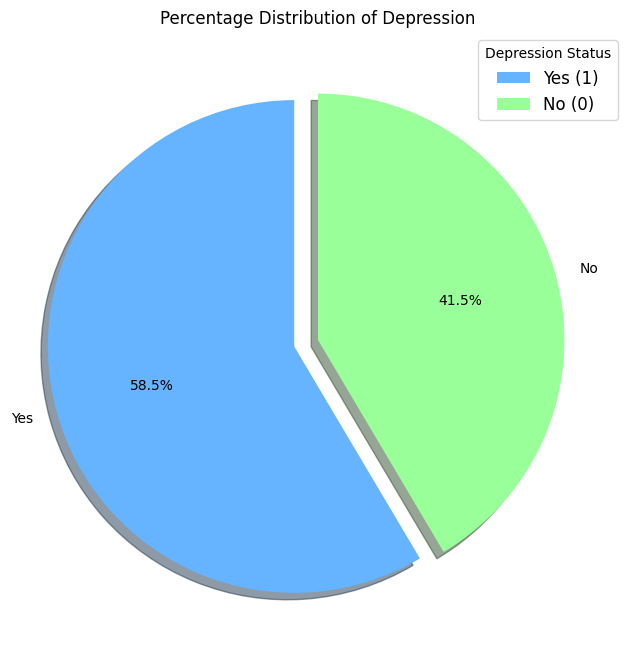

In [89]:
#### Balance Check
# Check the balance of the response variable (Depression)
print("Balance of the response variable (Depression):")
depression_counts = sd_df["Depression"].value_counts()
depression_percentages = depression_counts / depression_counts.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(
    depression_percentages, 
    labels=['Yes', 'No'],  # Custom labels for the classes (0 = No, 1 = Yes)
    autopct='%1.1f%%',  # Show percentages with 1 decimal point
    colors=['#66b3ff', '#99ff99'],  # Optional: customize colors
    startangle=90,  # Start angle for better orientation
    explode=(0.1, 0),  # Optional: explode the first slice slightly
    shadow=True  # Optional: add shadow for better visualization
)

# Add a legend
plt.legend(
    labels=['Yes (1)', 'No (0)'],  # Legend showing the class labels
    title="Depression Status",  # Title for the legend
    loc="best",  # Location of the legend
    fontsize=12  # Font size for the legend
)

# Add title
plt.title("Percentage Distribution of Depression")

# Show the pie chart
plt.show()

COMMENT: When working with imbalanced datasets, machine learning models may be biased towards the majority class, leading to poor performance in predicting the minority class. This is especially problematic in classification tasks where accurately predicting both classes is essential. Techniques like oversampling, undersampling, or SMOTE can help balance the dataset by increasing the minority class's representation. Balancing is necessary for models to learn both classes effectively and to improve metrics like precision, recall, and F1-score, which are crucial for accurate predictions in imbalanced settings. 

In [90]:
#### CHOOSE THE BALANCING TECHNIQUE
# Calculate the difference between the two categories
difference = depression_counts.get(1, 0) - depression_counts.get(0, 0)
print("Difference between the two classes (Depression=1 and Depression=0):", difference)

Difference between the two classes (Depression=1 and Depression=0): 4730


COMMENT: There is a difference of 4743 between the two classes, meaning that class 1 (Depression = Yes) is significantly overrepresented compared to class 0 (Depression = No). It suggests that the dataset is imbalanced in favor of class 1.

**Firstly, we apply the undersampling technique.** Its drawback is the probable loss of valuable data from the majority class, which might reduce the model's ability to generalize.

In [92]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#### UNDERSAMPLING for the majority class 1, meaning suffering from depression
# Separate features (X) and target variable (y)
X = sd_df.drop(columns=["Depression"])  # All columns except 'Depression' 
y = sd_df["Depression"]  # Target variable

# Get the number of instances in the majority class (class 0)
majority_class_count = len(y[y == 0])

# Apply undersampling to balance the classes by setting class 1 to the same size as class 0
undersampler = RandomUnderSampler(sampling_strategy={1: majority_class_count}, random_state=42)

# Resample the dataset
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after undersampling:", Counter(y_resampled))

Class distribution after undersampling: Counter({0: 11517, 1: 11517})


In [93]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)  
df_resampled["Depression"] = y_resampled 
df_resampled.shape

(23034, 16)

In [94]:
print(df_resampled)

       Gender  Age         City Profession  Academic Pressure  CGPA  \
1      Female   24    Bangalore    Student                  2  5.90   
2        Male   31     Srinagar    Student                  3  7.03   
4      Female   25       Jaipur    Student                  4  8.13   
5        Male   29         Pune    Student                  2  5.70   
6        Male   30        Thane    Student                  3  9.54   
...       ...  ...          ...        ...                ...   ...   
5668   Female   28       Jaipur    Student                  5  7.53   
20672  Female   24  Vasai-Virar    Student                  3  9.40   
6119     Male   26       Kalyan    Student                  3  6.75   
27153    Male   29      Chennai    Student                  3  7.27   
27259    Male   28        Patna    Student                  3  8.38   

       Study Satisfaction     Sleep Duration Dietary Habits Suicidal Thoughts  \
1                       5          5-6 hours       Moderate       

In [95]:
# Frequency of category for every categorical variable
# Assuming you're using df_resampled for the analysis, update this to your dataset variable name if needed
categorical_columns = ['Gender', 'City', 'Profession', 'Academic Pressure', 'Study Satisfaction',
                       'Sleep Duration', 'Dietary Habits', 'Suicidal Thoughts', 'Study Hours', 
                       'Financial Stress', 'Mental History', 'Education Level', 'Faculty']

# Loop through each categorical variable and calculate the frequency of categories
for column in categorical_columns:
    print(f"Frequency distribution for {column}:")
    print(df_resampled[column].value_counts())  # Use df_resampled or the dataset you want to analyze
    print("-" * 50)  # Separator for better readability

Frequency distribution for Gender:
Gender
Male      12837
Female    10197
Name: count, dtype: int64
--------------------------------------------------
Frequency distribution for City:
City
Kalyan           1291
Srinagar         1153
Vasai-Virar      1084
Hyderabad        1069
Lucknow           978
Thane             949
Agra              931
Ludhiana          917
Surat             890
Kolkata           860
Jaipur            860
Patna             821
Visakhapatnam     804
Pune              796
Bhopal            765
Ahmedabad         756
Chennai           713
Rajkot            682
Meerut            674
Bangalore         645
Delhi             618
Ghaziabad         614
Vadodara          584
Varanasi          579
Mumbai            570
Indore            539
Nagpur            532
Kanpur            512
Nashik            463
Faridabad         385
Name: count, dtype: int64
--------------------------------------------------
Frequency distribution for Profession:
Profession
Student    23034
Name: c

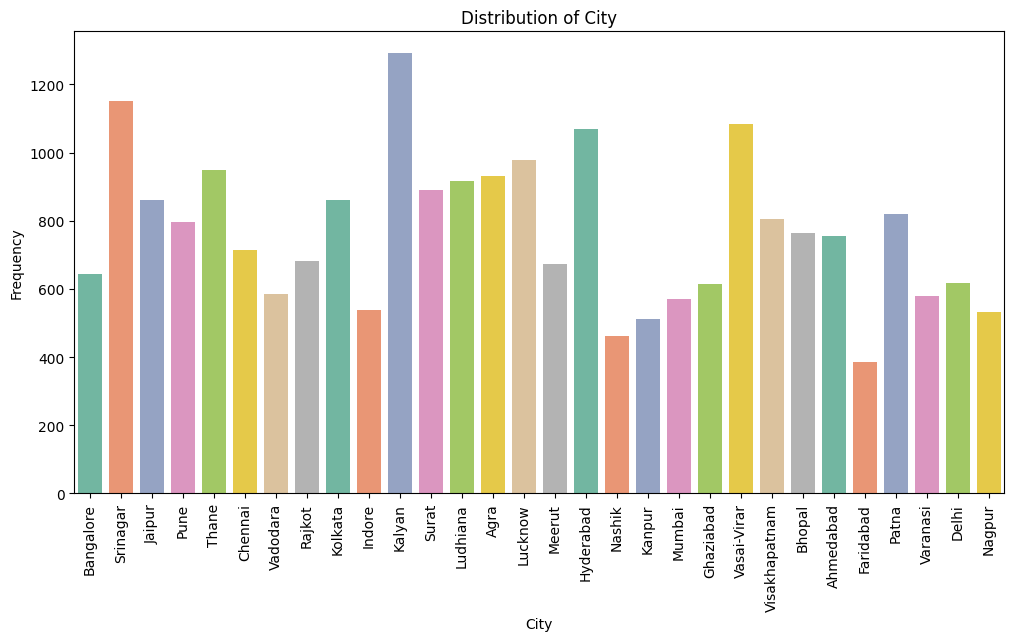

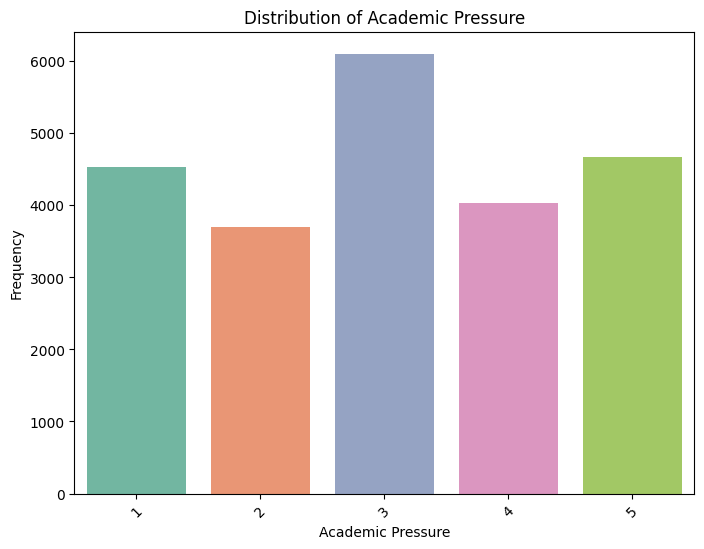

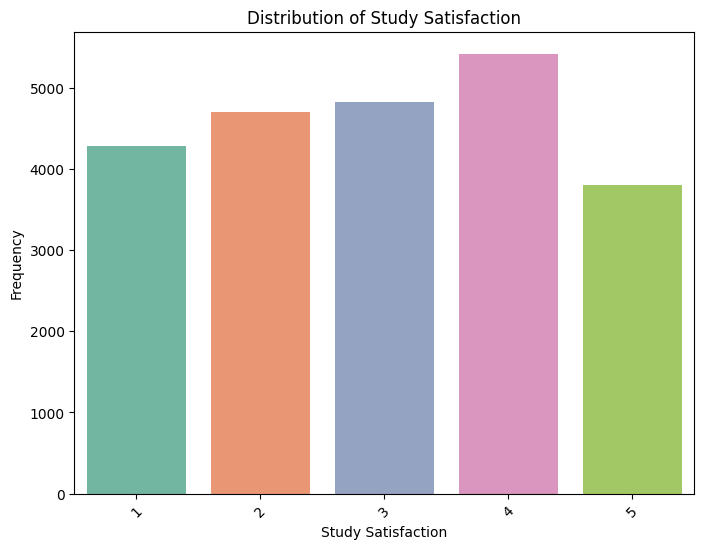

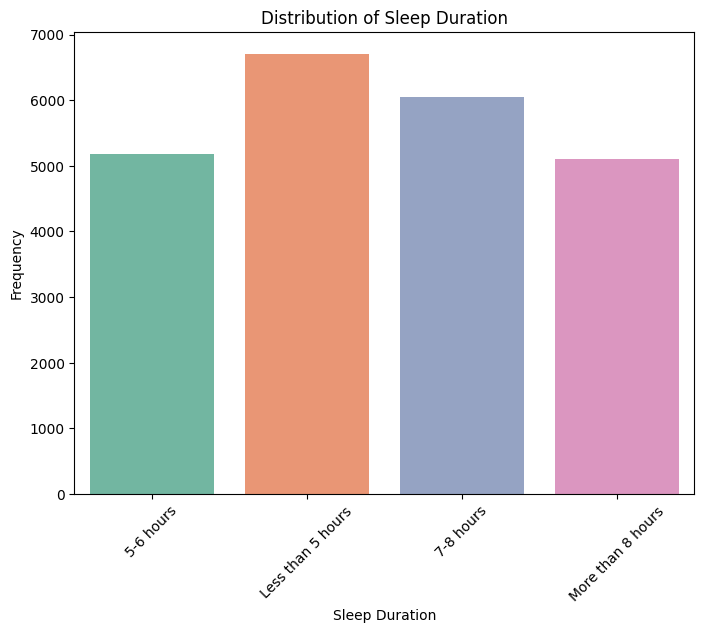

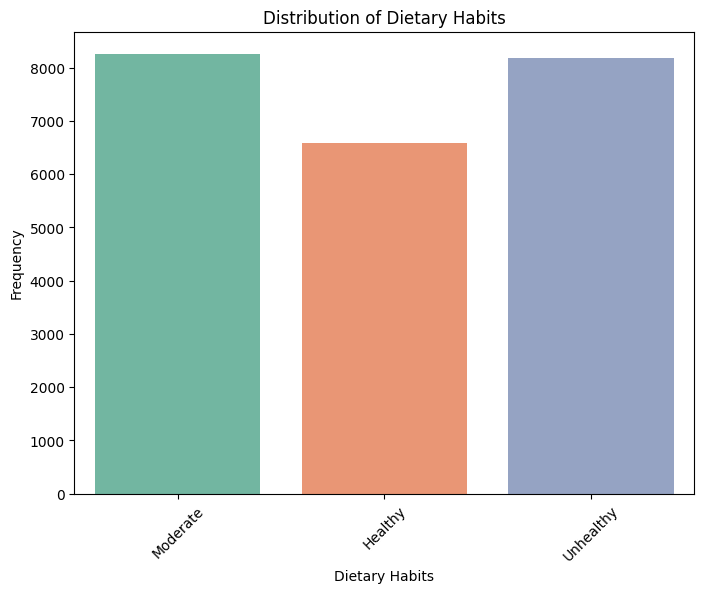

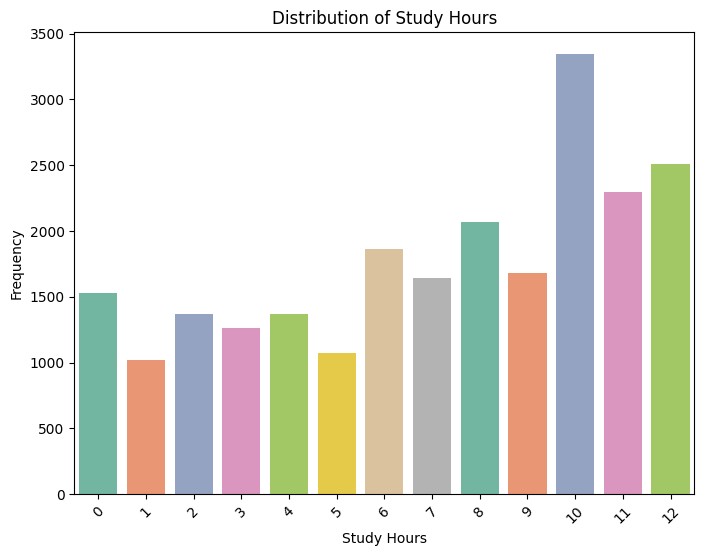

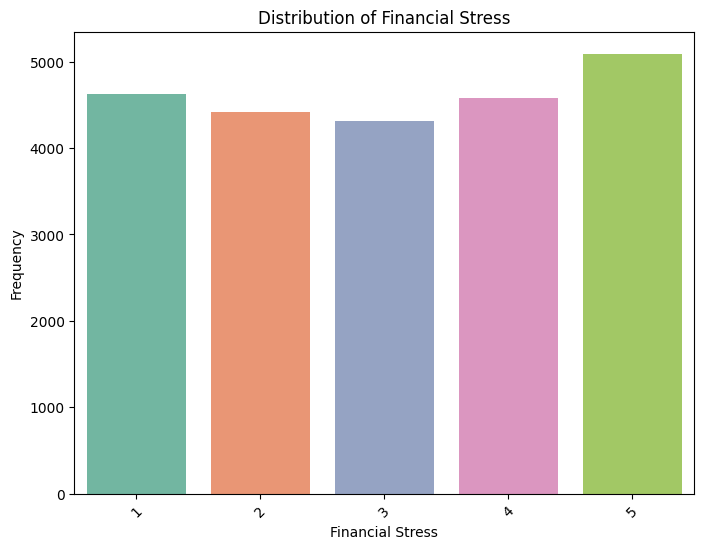

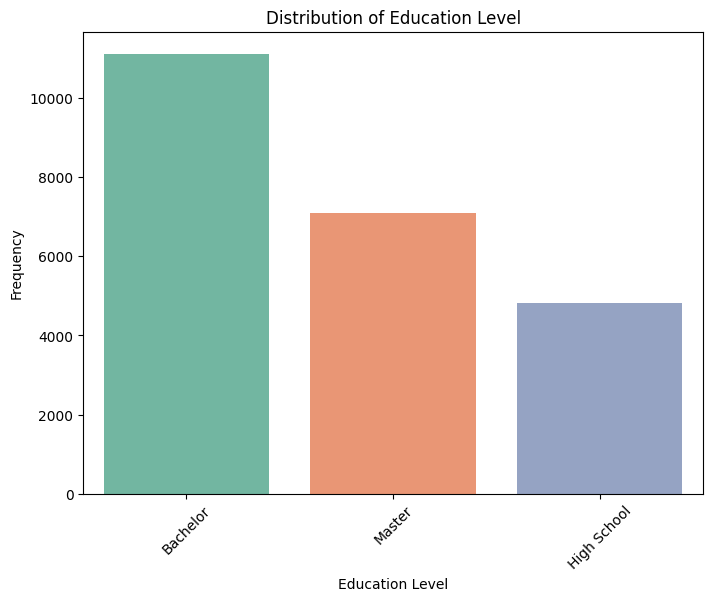

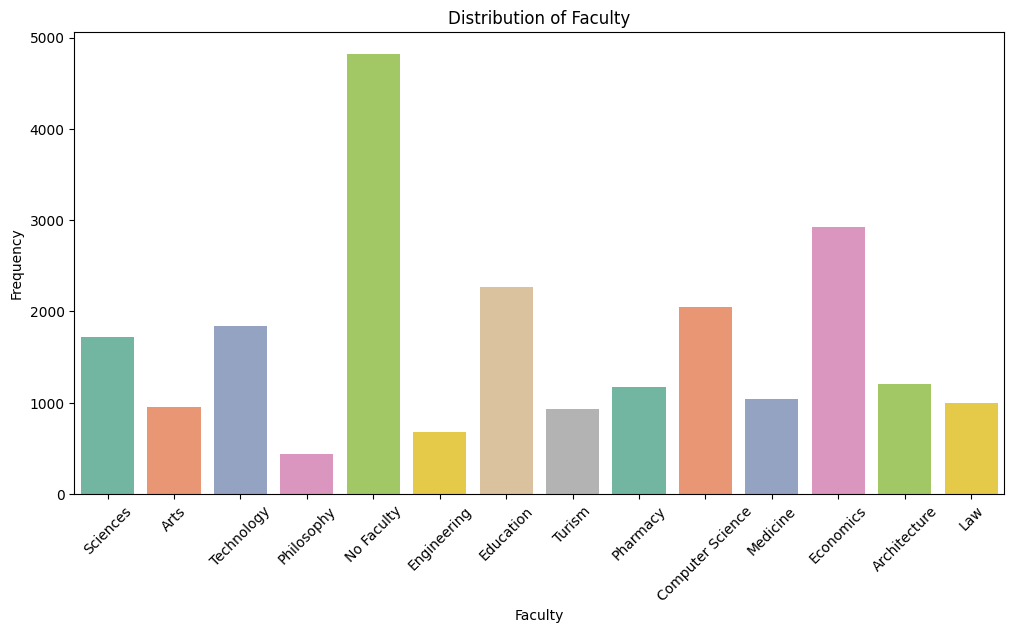

In [96]:
# List of categorical variables to visualize
selected_categorical_columns = ["City", "Academic Pressure", "Study Satisfaction", 
                                "Sleep Duration", "Dietary Habits", "Study Hours", 
                               "Financial Stress", "Education Level", "Faculty"]  

# Generate count plots only for the selected categorical columns
for column in selected_categorical_columns:
    # Adjust figure size only for City
    if column in ["City", "Faculty"]:
        plt.figure(figsize=(12, 6))  # Wider figure for city names
    else:
        plt.figure(figsize=(8, 6))  # Default size for other categories

    sns.countplot(data=df_resampled, x=column, hue=column, palette="Set2", legend=False)  
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

    if column == "City":
        plt.xticks(rotation=90)  # Rotate city names vertically for better readability
    else:
        plt.xticks(rotation=45)  # Default rotation for other categories

    plt.show()

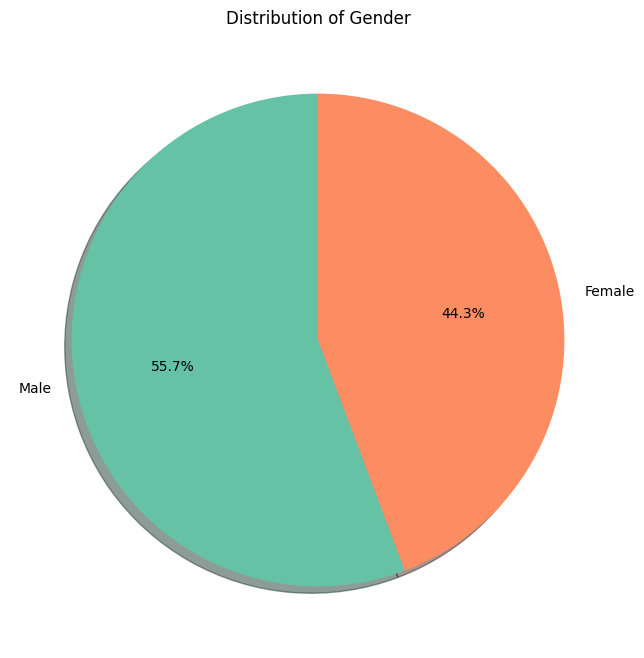

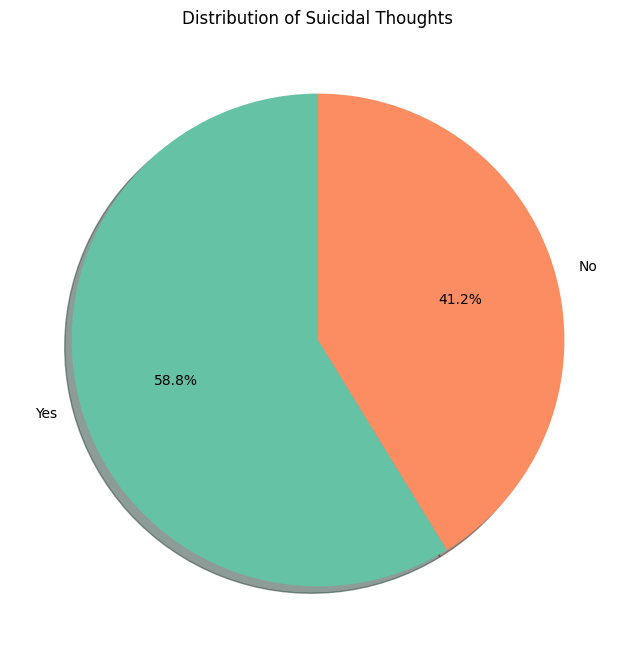

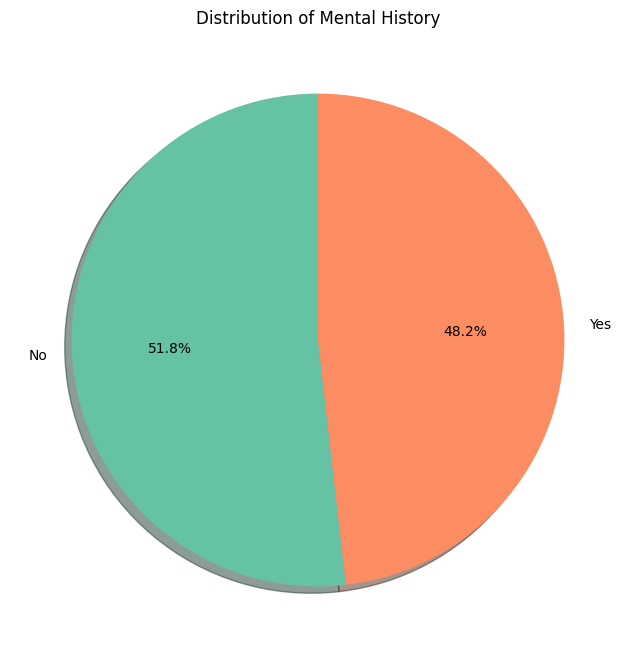

In [97]:
# Visualize through a pie chart, the binary variables distribution
# List of categorical variables for pie charts
selected_pie_columns = ["Gender", "Suicidal Thoughts", "Mental History"]  

# Generate pie charts for the selected categorical columns
for column in selected_pie_columns:
    plt.figure(figsize=(8, 8))  # Set decent size for pie charts
    
    # Calculate value counts and percentages
    value_counts = df_resampled[column].value_counts()
    percentages = value_counts / value_counts.sum() * 100
    
    # Create pie chart
    plt.pie(
        percentages, 
        labels=value_counts.index, 
        autopct='%1.1f%%',  # Show percentages with 1 decimal point
        colors=plt.cm.Set2.colors,  # Use a good color palette
        startangle=90,  # Rotate for better orientation
        shadow=True  # Add shadow for better visibility
    )
    
    # Add title
    plt.title(f"Distribution of {column}")
    
    # Show the pie chart
    plt.show()


#### Quantitative variables' analysis

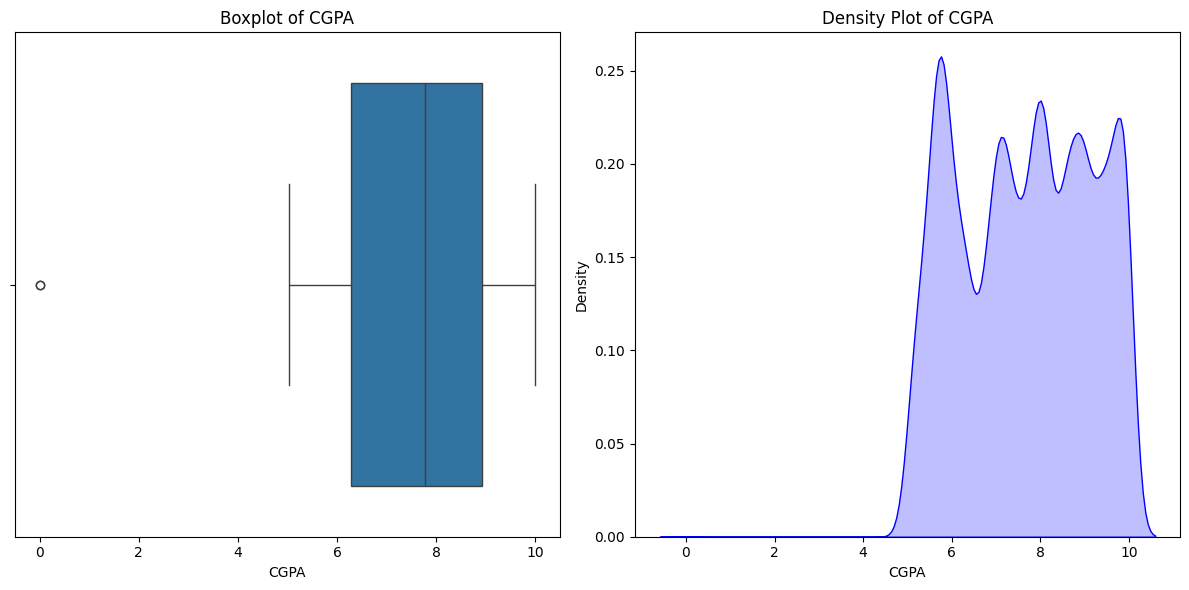

In [98]:
import seaborn as sns

# Define the variable name
var_name = 'CGPA'  # Replace with your actual variable name

# Create the figure for both plots
plt.figure(figsize=(12, 6))

# Create subplot for the boxplot
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.boxplot(data=df_resampled, x=var_name)  # Removed palette argument
plt.title(f'Boxplot of {var_name}')
plt.xlabel(var_name)

# Create subplot for the density plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_resampled, x=var_name, fill=True, color='b')  # Replaced shade=True with fill=True
plt.title(f'Density Plot of {var_name}')
plt.xlabel(var_name)

# Display the plots
plt.tight_layout()
plt.show()

COMMENT: The CGPA variable has an outlier and it is left-skewed. 
Since the logistic regression and other classification models may be affected by skewness, it is better to check if applying a transformation to data, their distribution will be much more closer to a normal one. 

In [100]:
import numpy as np
df_resampled['CGPA_transformed'] = np.log(df_resampled['CGPA'] + 1)  # +1 to avoid divisions per 0
df_resampled.shape
df_resampled.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Suicidal Thoughts', 'Study Hours', 'Financial Stress',
       'Mental History', 'Education Level', 'Faculty', 'Depression',
       'CGPA_transformed'],
      dtype='object')

In [ ]:
# Check the transformation has correctly occurred
# Define the variable name
var_name = 'CGPA_transformed'  # Replace with your actual variable name

# Create the figure for both plots
plt.figure(figsize=(12, 6))

# Create subplot for the boxplot
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.boxplot(data=df_resampled, x=var_name)  # Removed palette argument
plt.title(f'Boxplot of {var_name}')
plt.xlabel(var_name)

# Create subplot for the density plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_resampled, x=var_name, fill=True, color='b')  # Replaced shade=True with fill=True
plt.title(f'Density Plot of {var_name}')
plt.xlabel(var_name)

# Display the plots
plt.tight_layout()
plt.show()

COMMENT: It doesn't change so much since the data are still skewed and still characterized by outliers. So, we can continue with original variable but removing the outliers.

In [101]:
df_resampled.shape
# Remove the column from the dataframe
df_resampled = df_resampled.drop('CGPA_transformed', axis=1) 
df_resampled.shape
print(df_resampled.columns)
df_resampled.shape

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Suicidal Thoughts', 'Study Hours', 'Financial Stress',
       'Mental History', 'Education Level', 'Faculty', 'Depression'],
      dtype='object')


(23034, 16)

In [102]:
# Remove outliers
# Calculate Q1, Q3, and IQR
Q1 = df_resampled['CGPA'].quantile(0.25)
Q3 = df_resampled['CGPA'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check how many outliers are outside of these bounds before filtering
outliers_before = df_resampled[(df_resampled['CGPA'] < lower_bound) | (df_resampled['CGPA'] > upper_bound)]
print("Number of outliers before filtering:", len(outliers_before))

# Now, filter the outliers
df_resampled = df_resampled[(df_resampled['CGPA'] >= lower_bound) & (df_resampled['CGPA'] <= upper_bound)]

# Check the shape of the DataFrame after removing outliers
print("Shape after removing outliers:", df_resampled.shape)

# Check the min and max of 'CGPA' again
print("Min CGPA after removing outliers:", df_resampled['CGPA'].min())
print("Max CGPA after removing outliers:", df_resampled['CGPA'].max())

# Check if any outliers are still present
outliers_after = df_resampled[(df_resampled['CGPA'] < lower_bound) | (df_resampled['CGPA'] > upper_bound)]
print("Number of outliers after filtering:", len(outliers_after))

Number of outliers before filtering: 2
Shape after removing outliers: (23032, 16)
Min CGPA after removing outliers: 5.03
Max CGPA after removing outliers: 10.0
Number of outliers after filtering: 0


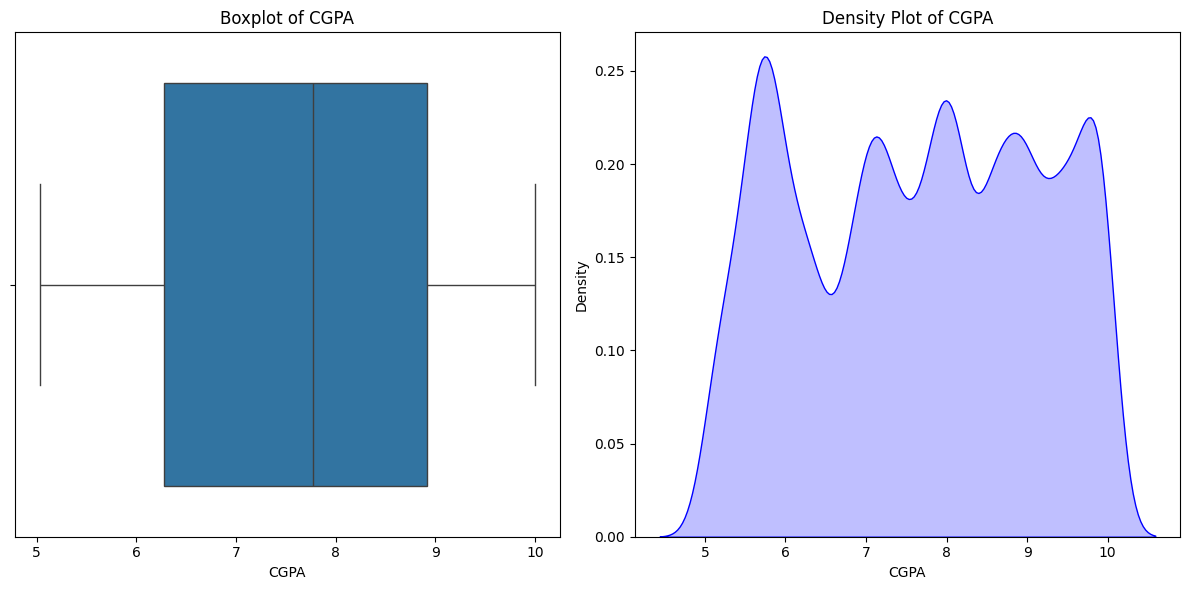

In [103]:
# Create the boxplot and density plot for the 'CGPA' column
# Variable name
var_name = 'CGPA'

# Create the figure for both plots
plt.figure(figsize=(12, 6))

# Create subplot for the boxplot
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.boxplot(data=df_resampled, x=var_name)  # Boxplot for CGPA
plt.title(f'Boxplot of {var_name}')
plt.xlabel(var_name)

# Create subplot for the density plot
plt.subplot(1, 2, 2)  # (rows, columns, index)
sns.kdeplot(data=df_resampled, x=var_name, fill=True, color='b')  # Density plot for CGPA
plt.title(f'Density Plot of {var_name}')
plt.xlabel(var_name)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

COMMENT: Since the peaks can cause overfitting, we can transform the numeric variable into a categorical one. This can help improve model performance or make the interpretation easier.

In [104]:
# Discretize the CGPA into 6 bins
bins = [5, 6, 7, 8, 9, 10]  # Define the bin edges (e.g., CGPA ranges)
labels = [5.5, 6.5, 7.5, 8.5, 9.5]  # Labels for the bins

df_resampled['CGPA_category'] = pd.cut(df_resampled['CGPA'], bins=bins, labels=labels, include_lowest=True)

print(df_resampled)

       Gender  Age         City Profession  Academic Pressure  CGPA  \
1      Female   24    Bangalore    Student                  2  5.90   
2        Male   31     Srinagar    Student                  3  7.03   
4      Female   25       Jaipur    Student                  4  8.13   
5        Male   29         Pune    Student                  2  5.70   
6        Male   30        Thane    Student                  3  9.54   
...       ...  ...          ...        ...                ...   ...   
5668   Female   28       Jaipur    Student                  5  7.53   
20672  Female   24  Vasai-Virar    Student                  3  9.40   
6119     Male   26       Kalyan    Student                  3  6.75   
27153    Male   29      Chennai    Student                  3  7.27   
27259    Male   28        Patna    Student                  3  8.38   

       Study Satisfaction     Sleep Duration Dietary Habits Suicidal Thoughts  \
1                       5          5-6 hours       Moderate       

COMMENT: Now that we have transformed the variable, we can remove the orginal one from the dataset

In [125]:
df_resampled = df_resampled.drop(columns=['CGPA'])

In [ ]:
df_resampled.shape

In [ ]:
# Check the type of variables
print(df_resampled.dtypes)

In [ ]:
# CORRECT TYPE ASSIGNATION
# From object to category
df_resampled['Profession'] = df_resampled['Profession'].astype('category')
df_resampled['Education Level'] = df_resampled['Education Level'].astype('category')
df_resampled['Faculty'] = df_resampled['Faculty'].astype('category')
df_resampled['Dietary Habits'] = df_resampled['Dietary Habits'].astype('category')
df_resampled['Sleep Duration'] = df_resampled['Sleep Duration'].astype('category')

# From category to object
df_resampled['CGPA_category'] = df_resampled['CGPA_category'].astype('object')


print(df_resampled.dtypes)

In [ ]:
print(df_resampled)

####################################

# TIPS but I did it after
SUGGESTIONS
MODIFY IT
from scipy.stats import chi2_contingency

List of categorical columns  
categorical_columns = ['Gender', 'City', 'Profession', 'Academic Pressure', 
                       'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 
                       'Dietary Habits', 'Degree', 'Suicidal Thoughts', 'Mental History', 
                       'Financial Stress']

Perform Chi-Square Test for each categorical feature against the target 'Depression'  
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['Depression'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {column}: p-value = {p_value}")
    if p_value < 0.05:
        print(f"There's a significant relationship between {column} and Depression.")
    else:
        print(f"No significant relationship between {column} and Depression.")

CONTINUOUS VARIABLES  
For continuous features, visualize with boxplots  
import seaborn as sns
import matplotlib.pyplot as plt

for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="Depression", y=column)
    plt.title(f"Distribution of {column} with respect to Depression")
    plt.show()

#############################

## PREDICTIVE STATISTICS

Logistic Regression   
Support Vector Machine (SVM)    
Random Forest  
K-Nearest Neighbors (KNN)  
Decision Tree  
Gradient Boosting  
Naive Bayes  

VARIABLE CONVERSION  
To refine the analysis, we can convert the ordinal categorical variable into discrete quantitative variable to provide order information in the execution of models. 

In [131]:
#### Dietary Habits
# Convert the Dietary Habits from a categorical variable to a discrete quantitative one to 
# highlight the ranking between categories.
# Define a numeric mapping based on ordinal relationship

diet_numeric_mapping = {
    'Unhealthy': 1,  
    'Moderate': 2,           
    'Healthy': 3,             
    'Others': 0               
}

# Apply the numeric mapping
df_resampled['Dietary Habits'] = df_resampled['Dietary Habits'].map(diet_numeric_mapping)

In [132]:
#### Education Level
# Convert the Education Level from a categorical variable to a discrete quantitative one to 
# highlight the ranking between categories.
# Define a numeric mapping based on ordinal relationship

ed_level_mapping = {
    'High School': 1,
    'Bachelor': 2, 
    'Master': 3,                     
    'Others': 0             
}

# Apply the numeric mapping
df_resampled['Education Level'] = df_resampled['Education Level'].map(ed_level_mapping)

In [133]:
#### Sleep Duration
# Convert the Sleep Duration from a categorical variable to a discrete quantitative one to 
# highlight the ranking between categories.
# Define a numeric mapping based on ordinal relationship

sleep_duration_numeric_mapping = {
    'Less than 5 hours': 4,  # Very short sleep
    '5-6 hours': 5.5,           # Short sleep
    '7-8 hours': 7.5,           # Average sleep
    'More than 8 hours': 9,   # Long sleep
    'Others': 0               # Unknown
}

# Apply the numeric mapping
df_resampled['Sleep Duration'] = df_resampled['Sleep Duration'].map(sleep_duration_numeric_mapping)

In [134]:
gender_mapping = {'Male': 0, 'Female': 1}
df_resampled['Gender'] = df_resampled['Gender'].map(gender_mapping)

In [135]:
mental_history_mapping = {'Yes': 1, 'No': 0}
df_resampled['Mental History'] = df_resampled['Mental History'].map(mental_history_mapping)

In [136]:
suicidal_thoughts_mapping = {'Yes': 1, 'No': 0}
df_resampled['Suicidal Thoughts'] = df_resampled['Suicidal Thoughts'].map(suicidal_thoughts_mapping)

COMMENT: Since I have already checked they are all students, I can remove the variable giving that information. 

In [137]:
# Removing Profession from the Dataframe
df_resampled = df_resampled.drop(columns=['Profession'])

In [ ]:
print(df_resampled)

In [ ]:
df_resampled.dtypes

In [ ]:
# Correct the column types
df_resampled['Sleep Duration'] = df_resampled['Sleep Duration'].astype(float)
df_resampled['CGPA_category'] = df_resampled['CGPA_category'].astype(float)
df_resampled['Dietary Habits'] = df_resampled['Dietary Habits'].astype(int)

In [ ]:
df_resampled.dtypes

In [ ]:
# Analyse the relationship between the X and the Y
# T-TEST FOR ENCODED VARIABLES
from scipy import stats

# Execute the t-test for encoded variables
discrete_numerical_columns = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration',
                     'Dietary Habits', 'Study Hours', 'Financial Stress', 'CGPA_category']  

for col in discrete_numerical_columns:
    group_0 = df_resampled[df_resampled['Depression'] == 0][col]
    group_1 = df_resampled[df_resampled['Depression'] == 1][col]
    
    t_stat, p_value = stats.ttest_ind(group_0, group_1)
    print(f"T-test for {col}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

COMMENT: All the obtained p-values are less than 0.05, which means that there is a significant difference between the groups for each of the variables tested. In other words, all these variables (Age, Academic Pressure, Study Satisfaction, Sleep Duration, Dietary Habits, Study Hours, Financial Stress, CGPA_category) are significantly correlated with the target variable Depression.
=> For each variable, the zero hypothesis that there is no difference between groups (0 vs 1 for Depression) was rejected.

In [105]:
from scipy.stats import chi2_contingency

# Execute the Chi-test for categorical and binary variables
categorical_columns = ['Gender', 'City', 'Suicidal Thoughts', 
                       'Mental History', 'Education Level', 'Faculty']  

for col in categorical_columns:
    contingency_table = pd.crosstab(df_resampled['Depression'], df_resampled[col])
    
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square test for {col}: chi2-statistic = {chi2_stat:.3f}, p-value = {p_value:.3f}")

Chi-Square test for Gender: chi2-statistic = 0.092, p-value = 0.761
Chi-Square test for City: chi2-statistic = 147.274, p-value = 0.000
Chi-Square test for Suicidal Thoughts: chi2-statistic = 6836.243, p-value = 0.000
Chi-Square test for Mental History: chi2-statistic = 79.476, p-value = 0.000
Chi-Square test for Education Level: chi2-statistic = 445.803, p-value = 0.000
Chi-Square test for Faculty: chi2-statistic = 445.529, p-value = 0.000


COMMENT: All the obtained p-values from the Chi-Square tests, except for **Gender**, are less than 0.05, indicating a significant relationship between the groups for each of the variables tested. Specifically, **City**, **Suicidal Thoughts**, **Mental History**, **Education Level**, and **Faculty** are significantly associated with the target variable **Depression**. For each of these variables, the null hypothesis (which posits no association between the variable and Depression) was rejected, suggesting that these variables have a meaningful impact on the likelihood of depression. However, for **Gender**, the p-value is greater than 0.05, meaning that there is no significant relationship between **Gender** and **Depression**, and the null hypothesis cannot be rejected for this variable. Therefore, we can perform the classification task excluding this variable. 

TASK: quali analisi possono essere fatte con il classification task che non richiedono il one-encoding per ogni variabile? e scegliere quali modelli applicare